# Grafos (cont.)

Matriz de adjacência

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/1f5e0fd3-572c-479a-8a53-74d8212c5e5c.jpg" width=500>

#### Atividade:
Implemente o grafo como uma matriz de adjacências sabendo que ele possui os seguintes métodos


classe GrafoMA:
- adicionar_aresta(no_origem, no_destino, mao_dupla=True)
- verificar_vizinhos(nó)

In [ ]:
class GrafoMA:
    
    def __init__(self, n):
        self.adj = [[0]*n for _ in range(n)]
        
    def __repr__(self):
        return str('\n'.join([str(linha) for linha in self.adj]))
    
    def adicionar_aresta(self, linha, coluna, peso=1, mao_dupla=True):
        self.adj[coluna][linha] = peso
        
        if mao_dupla:
            self.adj[linha][coluna] = peso
            
    def obter_vizinhos(self, n):
        return [no for no, peso in enumerate(self.adj[n]) if peso != 0]

Listas de adjacências

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/9775dad0-c900-42e9-87fa-41d78b73444c.jpg" width=500>

#### Atividade:
Implemente o grafo como uma lista de adjacências sabendo que ele possui os seguintes métodos


classe GrafoLA:
- adicionar_aresta(no_origem, no_destino, mao_dupla=True)
- verificar_vizinhos(nó)


In [1]:
class GrafoLA:
    def __init__(self, n):
        self.adj = [[] for _ in range(n)]
    
    
    def __repr__(self):
        return '\n'.join([str(line) for line in self.adj])
        
    
    def add_edge(self, n1, n2, mao_dupla=True):
        self.adj[n1].append(n2)
        
        if mao_dupla:
            self.adj[n2].append(n1)
            
        
    def get_neighbors(self, n):
        return self.adj[n]

In [2]:
g2 = GrafoLA(4)

g2

[]
[]
[]
[]

In [3]:
g2.get_neighbors(3)

[]

In [4]:
g2.get_neighbors(0)

[]

In [5]:
g2.add_edge(0, 1)

g2.add_edge(2, 1)

g2.add_edge(2, 3, mao_dupla = False)

g2.add_edge(0, 3, mao_dupla = False)

g2

[1, 3]
[0, 2]
[1, 3]
[]

#### Pergunta: como representar grafos ponderados (com pesos) com lista de adjacência?

Com tuplas

## Percurso em Grafos

Percorrer um grafo é passar por cada nó "visitando" ele apenas uma vez

> Muitas vezes o interesse não é a visita em sí, e sim o **caminho percorrido para chegar a esse nó, na ordem em que esses nós são visitados**

Por esse motivo, algoritmos de percurso precisam respeitar as arestas do grafo. Vamos conhecer duas formas de percorrer grafos:

- BFS - Breadth First Search (busca em largura)
- DFS - Depth First Search (busca em profundidade)

<img src="https://miro.medium.com/max/1280/0*miG6xdyYzdvrB67S.gif" width=450>

### Busca em profundidade (DFS - Depth First Search)

Ao entrar em um nó do grafo, escolhe um caminho e vai até o final dele. Quando chega no final retorna, escolhe outro caminho e vai até o final dele.
Esse processo é repetido até visitar todos nós.

Abaixo temos um exemplo de como a busca em profundidade percorreria esse grafo partindo do nó 0.

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/0084b080-e980-46d0-8694-55895333a3e7.jpg" width=600>

#### Atividade:

Implemente o DFS na classe GrafoLA, com a seguinte assinatura:

DFS(self, n) -> List[n]

In [ ]:
# DFS(n) -> ordem_visitados
# Inicia no vértice n. Para cada vértice vizinho, 
# visitado[vizinho] = 1 se vizinho já foi visitado. 
# visitado[] é inicializado com zeros.
# Visita todos os vértices possíveis a partir
# de n. ordem_visitados[] e existe somente para 
# visualizarmos a ordem ao final


# visitado[n] := 1
# adiciona n em ordem_visitados
# para cada vertice vizinho adjacente de u faça
#     se visitado[vizinho] = 0 então
#         DFS(vizinho)

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/9775dad0-c900-42e9-87fa-41d78b73444c.jpg" width=500>

In [ ]:
class GrafoLA:
    def __init__(self, n):
        self.adj = [[] for _ in range(n)]
        self.__visitado = []
        self.ordem_visitados = []
    
    
    def __repr__(self):
        return '\n'.join([str(line) for line in self.adj])
        
    
    def adiciona_aresta(self, n1, n2, mao_dupla=True):
        self.adj[n1].append(n2)
        
        if mao_dupla:
            self.adj[n2].append(n1)
            
        
    def obter_vizinhos(self, n):
        return self.adj[n]

    def __visitar(self, node):
        self.__visitado[node] = 1
        self.ordem_visitados.append(node)

    
    def __dfs(self, n):
        self.__visit(n)
        for vizinho in self.obter_vizinho(n):
            if self.__visitado[vizinho] == 0:
                self.__dfs(vizinho)

    def DFS(self, n):
        self.__visitado = [0]*len(self.adj)
        self.ordem_visitados = []
        self.__dfs(n)
        return self.ordem_visitados

In [ ]:
g3 = GrafoLA(7)
g3.adiciona_aresta(0, 1)
g3.adiciona_aresta(0, 2)
g3.adiciona_aresta(1, 2)
g3.adiciona_aresta(1, 3)
g3.adiciona_aresta(2, 4)
g3.adiciona_aresta(3, 4)
g3.adiciona_aresta(4, 5)
g3.adiciona_aresta(5, 6)
print(g3, "\n")

visited_order = g3.DFS(4)
visited_order

#### Busca em largura (BFS - Breadth First Search)

Visita os nós em camadas. Primeiro os que são adjacentes (nível 0). Depois os que estão no próximo nível de distância do nó inicial. Assim até visitar todos os nós.

A figura abaixo mostra um exemplo gráfico desse comportamento em camadas.

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/a67dd98f-8578-4bda-a710-903d7de9ceb6.jpg" width=600>

A ordem de visitação dos nós não é importante no BFS, desde que sejam respeitados os níveis.

#### Atividade:

Implemente o BFS na classe GrafoLA, com a seguinte assinatura:

BFS(self, n) -> List[n]

In [ ]:
# BFS(n) -> ordem_visitados
# Inicia no vértice n. Para cada vértice vizinho, 
# visitado[vizinho] = 1 se vizinho já foi visitado. 
# visitado[] é inicializado com zeros.
# ordem_visitados[] e existe somente para 
# visualizarmos a ordem ao final

# nao_visitados := []
# ordem_visitados := []
# visitado[n] := 1
# adiciona n em ordem_visitados
# repete:
#   para cada vertice vizinho adjacente de n faça
#       se visitado[vizinho] = 0 então
#           adiciona vizinho em nao_visitados
#           visitado[vizinho] := 1
#           adiciona vizinho em ordem_visitados
#   se nao_visitados esta vazio então retorna ordem_visitados
#   n := remove n de nao_visitados

In [6]:
class GrafoLA:
    def __init__(self, n):
        self.adj = [[] for _ in range(n)]
        self.__visitado = []
        self.ordem_visitados = []
    
    
    def __repr__(self):
        return '\n'.join([str(line) for line in self.adj])
        
    
    def adiciona_aresta(self, n1, n2, mao_dupla=True):
        self.adj[n1].append(n2)
        
        if mao_dupla:
            self.adj[n2].append(n1)
            
        
    def obter_vizinhos(self, n):
        return self.adj[n]

    def __visitar(self, node):
        self.__visitado[node] = 1
        self.ordem_visitados.append(node)

    
    def __dfs(self, n):
        self.__visit(n)
        for vizinho in self.obter_vizinho(n):
            if self.__visitado[vizinho] == 0:
                self.__dfs(vizinho)

    def DFS(self, n):
        self.__visitado = [0]*len(self.adj)
        self.ordem_visitados = []
        self.__dfs(n)
        return self.ordem_visitados


    def BFS(self, n):
        self.__visitado = [0]*len(self.adj)
        self.ordem_visitados = []
        nao_visitados = []
        
        self.__visitar(n)
        
        while True:
            for vizinho in self.obter_vizinhos(n):
                if self.__visitado[vizinho] == 0:
                    nao_visitados.append(vizinho)
                    self.__visitar(vizinho)
            if not nao_visitados:
                return self.ordem_visitados
            n = nao_visitados.pop(0)

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/9775dad0-c900-42e9-87fa-41d78b73444c.jpg" width=500>

In [7]:
g3 = GrafoLA(7)
g3.adiciona_aresta(0, 1)
g3.adiciona_aresta(0, 2)
g3.adiciona_aresta(1, 2)
g3.adiciona_aresta(1, 3)
g3.adiciona_aresta(2, 4)
g3.adiciona_aresta(3, 4)
g3.adiciona_aresta(4, 5)
g3.adiciona_aresta(5, 6)
print(g3, "\n")

visited_order = g3.BFS(4)
visited_order

[1, 2]
[0, 2, 3]
[0, 1, 4]
[1, 4]
[2, 3, 5]
[4, 6]
[5] 



[4, 2, 3, 5, 0, 1, 6]

____________________

## 1) Grafos com networkx

Agoravamos aprender como usar a biblioteca [NetworkX!](https://networkx.org/) para a análise de grafos/redes em Python!

<img src="https://networkx.org/_static/networkx_logo.svg">

Primeiramente, se ainda não tiver instalado, instale a biblioteca com:

`!pip install networkx`

In [ ]:
pip install networkx


In [ ]:
pip install scipy

In [8]:
import networkx as nx
import numpy as np
import scipy as sp

Agora vamos recriar esses grafos com o networkx:

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/1f5e0fd3-572c-479a-8a53-74d8212c5e5c.jpg" width=500>

In [9]:
g1 = nx.Graph()

# adicionando um nó sem ligação
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_node.html
g1.add_node(0)
g1.add_node(1)
g1.add_node(2)
g1.add_node(3)
g1.add_node(4)
g1.add_node(5)
g1.add_node(6)

# adicionando as ligações:
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html
g1.add_edge(0, 1)
g1.add_edge(0, 2)

g1.add_edge(1, 2)
g1.add_edge(1, 3)

g1.add_edge(2, 4)

g1.add_edge(3, 4)

g1.add_edge(4, 3)
g1.add_edge(4, 5)

g1.add_edge(5, 6)

#############################
# https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
m1 = nx.adjacency_matrix(g1).todense()

print(m1)

[[0 1 1 0 0 0 0]
 [1 0 1 1 0 0 0]
 [1 1 0 0 1 0 0]
 [0 1 0 0 1 0 0]
 [0 0 1 1 0 1 0]
 [0 0 0 0 1 0 1]
 [0 0 0 0 0 1 0]]


<img src="https://algoritmosempython.com.br/images/algoritmos-python/algoritmos-grafos/GrafoMatrizAdjacencia.png" width=400>

In [10]:
# https://networkx.org/documentation/stable/reference/classes/digraph.html
g2 = nx.DiGraph()

g2.add_node(0)
g2.add_node(1)
g2.add_node(2)
g2.add_node(3)
g2.add_node(4)


g2.add_edge(0,1)

g2.add_edge(1,2)
g2.add_edge(1,3)

g2.add_edge(2,1)
g2.add_edge(2,4)

g2.add_edge(3,0)

g2.add_edge(4,1)

# https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html

m2 = nx.adjacency_matrix(g2).todense()
print(m2)


[[0 1 0 0 0]
 [0 0 1 1 0]
 [0 1 0 0 1]
 [1 0 0 0 0]
 [0 1 0 0 0]]


<img src="https://www.researchgate.net/profile/Paula-Gabrielly-Rodrigues/publication/326722760/figure/fig5/AS:654507780345864@1533058223380/Figura-4-7-Grafo-nao-ponderado-A-e-ponderado-B-com-suas-respectivas-matrizes-de.png" width=500> 

O objeto g1 tem uns atributos importantes:

In [11]:
g1.nodes

NodeView((0, 1, 2, 3, 4, 5, 6))

In [12]:
g1.number_of_nodes()

7

In [13]:
g1.edges

EdgeView([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (4, 5), (5, 6)])

In [14]:
g1.number_of_edges()

8

Para visualizarmos o grafo, existe a função `draw_netowrk()`:

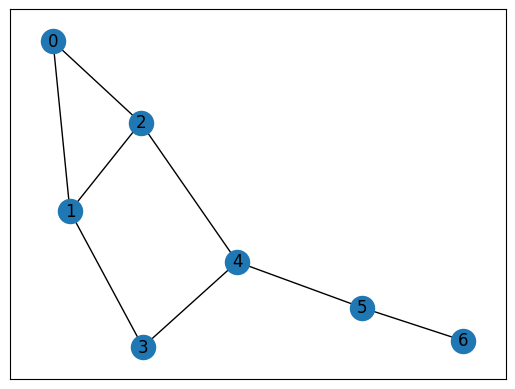

In [17]:
nx.draw_networkx(g1)

Toda vez que o método é executado, o grafo aparece em uma posição aleatória. Isso porque o algoritmo de plotagem do networkx se utiliza de seeds aleatórias para a posição inicial do grafo.

É possível entender qual foi a posição escolhida, usando a função `spring_layout()`:

In [18]:
my_pos = nx.spring_layout(g1, seed = 42)

my_pos

{0: array([-0.13317218, -0.79677282]),
 1: array([-0.36117115, -0.5014655 ]),
 2: array([-0.01505038, -0.38783578]),
 3: array([-0.38267027, -0.06549295]),
 4: array([0.02956378, 0.13511329]),
 5: array([0.31164107, 0.61645376]),
 6: array([0.55085913, 1.        ])}

Se quisermos que essa sempre seja a posição, basta fixarmos a seed e passar esse dicionário pra função de plot, como o argumento `pos`:

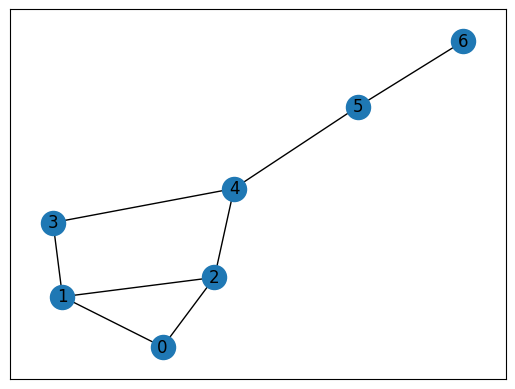

In [21]:
my_pos = nx.spring_layout(g1, seed = 42)

nx.draw_networkx(g1, pos=my_pos)

Depois vamos ver outros argumentos interessantes pra controlar a aparência do plot -- mas **explore você mesmo**!

Podemos recuperar a matriz de adjacência referente ao grafo:

In [22]:
m1 = nx.adjacency_matrix(g1)

Por padrão, a matriz é representada de maneira esparsa:

In [23]:
m1

<7x7 sparse array of type '<class 'numpy.intc'>'
	with 16 stored elements in Compressed Sparse Row format>

Caso se deseje visualizar a matriz completa, densa:

In [24]:
m1.todense()

array([[0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

Lembrando que os nós aparecem segundo a ordem em que os criamos! 

Esta ordem pode ser visualizada com:

In [ ]:
g1.nodes

Também é possível recuperar a lista de adjacência:

In [25]:
g1._adj

{0: {1: {}, 2: {}},
 1: {0: {}, 2: {}, 3: {}},
 2: {0: {}, 1: {}, 4: {}},
 3: {1: {}, 4: {}},
 4: {2: {}, 3: {}, 5: {}},
 5: {4: {}, 6: {}},
 6: {5: {}}}

Uma outra forma:

In [26]:
nx.generate_adjlist(g1)

<generator object generate_adjlist at 0x000001D1C82D6340>

In [27]:
for item in nx.generate_adjlist(g1):
    
    print(item)

0 1 2
1 2 3
2 4
3 4
4 5
5 6
6


In [ ]:
[item for item in nx.generate_adjlist(g1)]

In [ ]:
list(nx.generate_adjlist(g1))

Caso queiramos percorrer o grafo, o networkx nos disponibiliza [algoritmos de percurso:](https://networkx.org/documentation/stable/reference/algorithms/simple_paths.html)

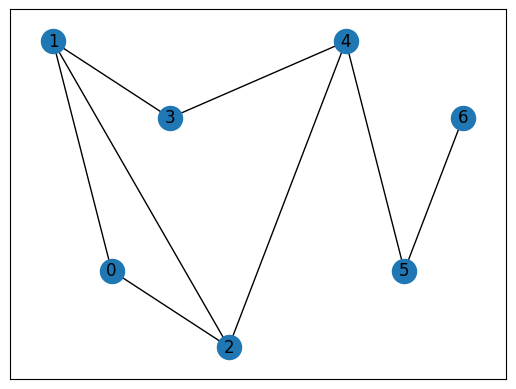

In [28]:
my_pos = {0: [-0.9, 0.4],
          1: [-1, 1],
          2: [-0.7, 0.2],
          3: [-0.8, 0.8],
          4: [-0.5, 1],
          5: [-0.4, 0.4],
          6: [-0.3, 0.8]}

nx.draw_networkx(g1, pos=my_pos)

In [29]:
nx.all_simple_paths(g1, 1, 5)

<generator object _all_simple_paths_graph at 0x000001D1C82D6C00>

In [30]:
caminhos = []

for path in nx.all_simple_paths(g1, 1, 5):
    
    caminhos.append(path)
    
caminhos

[[1, 0, 2, 4, 5], [1, 2, 4, 5], [1, 3, 4, 5]]

In [32]:
[path for path in nx.all_simple_paths(g1, 1, 5)]

[[1, 0, 2, 4, 5], [1, 2, 4, 5], [1, 3, 4, 5]]

O networkx também disponibiliza [algoritmos de menor caminho!](https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html)

In [35]:
# menor caminho sem considerar pesos!
# obs: pode não ser único!

nx.shortest_path(g1, 1, 5)

[1, 2, 4, 5]

In [36]:
[path for path in nx.all_shortest_paths(g1, 1, 5)]

[[1, 2, 4, 5], [1, 3, 4, 5]]

_____________

Implemente o grafo ponderado ilustrado pela figura abaixo, utilizando as representações baseadas em:

- matriz de adjacências;
- lista de adjacências.

Em seguida, exiba a matriz e a lista que representam o grafo.

<img src="https://ucarecdn.com/a67cb888-aa0c-424b-8c7f-847e38dd5691/" width=300>

In [37]:
g3 = nx.Graph()

g3.add_node(0)
g3.add_node(1)
g3.add_node(2)
g3.add_node(3)
g3.add_node(4)

g3.add_edge(0, 4, weight=8)
g3.add_edge(0, 1, weight=3)
g3.add_edge(0, 3, weight=7)

g3.add_edge(1, 2, weight=1)
g3.add_edge(1, 3, weight=4)

g3.add_edge(2, 3, weight=2)

g3.add_edge(3, 4, weight=3)

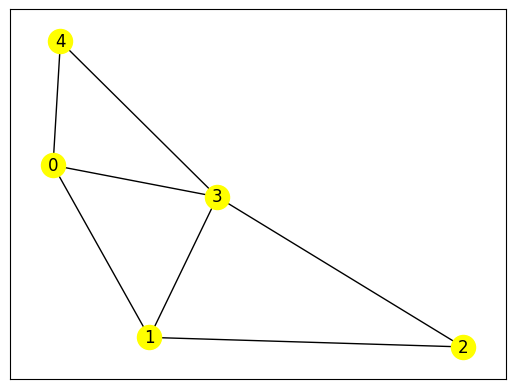

In [38]:
nx.draw_networkx(g3, node_color="yellow")

Caso queira plotar com os pesos:

In [39]:
pos = nx.spring_layout(g3) 

pos

{0: array([0.08484587, 0.46494042]),
 1: array([ 0.46744917, -0.20726489]),
 2: array([-0.1077903, -1.       ]),
 3: array([-0.12125833, -0.01623777]),
 4: array([-0.32324642,  0.75856224])}

In [40]:
labels = nx.get_edge_attributes(g3, 'weight')

labels

{(0, 4): 8, (0, 1): 3, (0, 3): 7, (1, 2): 1, (1, 3): 4, (2, 3): 2, (3, 4): 3}

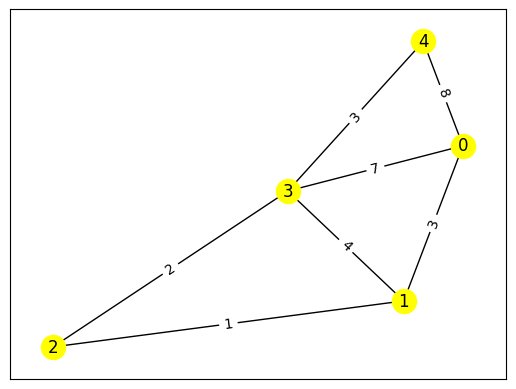

In [43]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(g3, seed=42) 
nx.draw_networkx(g3, pos, node_color="yellow")

labels = nx.get_edge_attributes(g3, 'weight')
nx.draw_networkx_edge_labels(g3, pos, edge_labels=labels)

plt.show()

Engrossando a largura das ligações proporcionalmente ao peso:

In [44]:
labels.values()

dict_values([8, 3, 7, 1, 4, 2, 3])

In [45]:
[x*0.8 for x in labels.values()]

[6.4,
 2.4000000000000004,
 5.6000000000000005,
 0.8,
 3.2,
 1.6,
 2.4000000000000004]

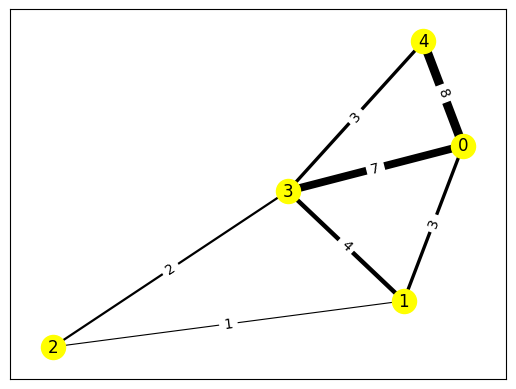

In [46]:
pos = nx.spring_layout(g3, seed=42) 
nx.draw_networkx(g3, pos, node_color="yellow", width=[x*0.8 for x in labels.values()])

labels = nx.get_edge_attributes(g3, 'weight')
nx.draw_networkx_edge_labels(g3, pos, edge_labels=labels)

plt.show()

As duas representações:

In [47]:
m3 = nx.adjacency_matrix(g3).todense()

m3

array([[0, 3, 0, 7, 8],
       [3, 0, 1, 4, 0],
       [0, 1, 0, 2, 0],
       [7, 4, 2, 0, 3],
       [8, 0, 0, 3, 0]], dtype=int32)

In [48]:
nx.adjacency_data(g3)["adjacency"]

[[{'weight': 8, 'id': 4}, {'weight': 3, 'id': 1}, {'weight': 7, 'id': 3}],
 [{'weight': 3, 'id': 0}, {'weight': 1, 'id': 2}, {'weight': 4, 'id': 3}],
 [{'weight': 1, 'id': 1}, {'weight': 2, 'id': 3}],
 [{'weight': 7, 'id': 0},
  {'weight': 4, 'id': 1},
  {'weight': 2, 'id': 2},
  {'weight': 3, 'id': 4}],
 [{'weight': 8, 'id': 0}, {'weight': 3, 'id': 3}]]

Vejamos todos os caminhos entre os nós 1 e 4:

In [49]:
[path for path in nx.all_simple_paths(g3, 1, 4)]

[[1, 0, 4],
 [1, 0, 3, 4],
 [1, 2, 3, 0, 4],
 [1, 2, 3, 4],
 [1, 3, 0, 4],
 [1, 3, 4]]

In [50]:
# todos os caminhos simples e as respectivas somas de pesos

[(path, 
  nx.path_weight(g3, path, weight="weight")) for path in nx.all_simple_paths(g3, 1, 4)]

[([1, 0, 4], 11),
 ([1, 0, 3, 4], 13),
 ([1, 2, 3, 0, 4], 18),
 ([1, 2, 3, 4], 6),
 ([1, 3, 0, 4], 19),
 ([1, 3, 4], 7)]

Considerando pesos para o menor caminho, temos dijkstra!

In [51]:
nx.dijkstra_path(g3, 1, 4)

[1, 2, 3, 4]

Caso queira saber o comprimento do menor caminho:

In [52]:
nx.dijkstra_path_length(g3, 1, 4)

6

In [53]:
(nx.dijkstra_path(g3, 1, 4), nx.dijkstra_path_length(g3, 1, 4))

([1, 2, 3, 4], 6)